In [459]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression

In [460]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\cost_revenue_dirty.csv")
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


### Explore and Clean

In [461]:
# Are there any null values?
df.isna().values.any()

False

In [462]:
# Are there any duplicate rows?
df[df.duplicated()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [463]:
# datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [464]:
# convert the columns with values in dollars to integer type 

remove = ['$', ',']
col_to_convert = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in col_to_convert:
    for char in remove:
       df[col] = df[col].str.replace(char, '')  
    df[col] = pd.to_numeric(df[col])
    
df.head()    

<ipython-input-464-4afc3d2942b5>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace(char, '')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [465]:
# Convert the Release_Date column to a Pandas Datetime type.

df.Release_Date = pd.to_datetime(df.Release_Date)
df.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Investigate the Films that had Zero Revenue

The average production budget of the films and average worldwide gross revenue

In [466]:
budget_avg = round(df.USD_Production_Budget.mean(), 2)
ww_gross = round(df.USD_Worldwide_Gross.mean(), 2)
print('average production budget and average worldwide gross revenue are respectively, ', budget_avg, 'and', ww_gross)

average production budget and average worldwide gross revenue are respectively,  31113737.58 and 88855421.96


What were the minimums for worldwide and domestic revenue?

In [467]:
ww_min = df.USD_Worldwide_Gross.min()
dom_min = df.USD_Domestic_Gross.min()
print('the minimum worldwide gross revenue and domestic revenue are respectively, ', ww_min, 'and', dom_min)

the minimum worldwide gross revenue and domestic revenue are respectively,  0 and 0


Are the bottom 25% of films actually profitable or do they lose money?

In [468]:
df[['USD_Production_Budget', 'USD_Worldwide_Gross']].describe()

,USD_Production_Budget,USD_Worldwide_Gross
count,5.391000e+03,5.391000e+03
mean,3.111374e+07,8.885542e+07
std,4.052380e+07,1.684578e+08
min,1.100000e+03,0.000000e+00
25%,5.000000e+06,3.865206e+06
50%,1.700000e+07,2.745045e+07
75%,4.000000e+07,9.645446e+07
max,4.250000e+08,2.783919e+09


###### The bottom 25% of films actually has a loss of about 25%  

What are the highest production budget and highest worldwide gross revenue of any film?

In [469]:
print('They are respectively:')
df[df['USD_Production_Budget'] == df['USD_Production_Budget'].max()]


They are respectively:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [470]:
df[df['USD_Worldwide_Gross'] == df['USD_Worldwide_Gross'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


 How much revenue did the lowest and highest budget films make?

In [471]:
df['Profit'] = df.USD_Worldwide_Gross - df.USD_Production_Budget
print('the lowest and highest revenues any film made are', df['Profit'].min(), 'and', df['Profit'].max())

the lowest and highest revenues any film made are -175000000 and 2358918982


 How many films grossed $0 domestically (i.e., in the United States) and worldwide? What were the highest budget films that grossed 
nothing?



In [472]:
domestic_zeros = df.Movie_Title[df.USD_Domestic_Gross == 0].count()
ww_zeros = df.Movie_Title[df.USD_Worldwide_Gross == 0].count()
print(f'A total of {domestic_zeros} and {ww_zeros} films grossed zero domestically and worldwide, respectively')

A total of 512 and 357 films grossed zero domestically and worldwide, respectively


In [473]:
dom_zero_max = df.USD_Production_Budget[df.USD_Domestic_Gross == 0].max()
ww_zero_max = df.USD_Production_Budget[df.USD_Worldwide_Gross == 0].max()

dom_zero_film = df.Movie_Title[df.USD_Production_Budget == dom_zero_max]
ww_zero_film = df.Movie_Title[df.USD_Production_Budget == ww_zero_max]
print(f"The highest budget films that grossed nothing domestically are {dom_zero_film}")

print(f"The highest budget films that grossed nothing worldwide are {ww_zero_film}")

The highest budget films that grossed nothing domestically are 795                                Waterworld
1264                           Wild Wild West
2922                            Evan Almighty
3063    The Mummy: Tomb of the Dragon Emperor
3353                      Monsters vs. Aliens
3385                                       Up
3415              G.I. Joe: The Rise of Cobra
4517                                 47 Ronin
4928                               Inside Out
5171                          The Jungle Book
5186                            Suicide Squad
5363                   Spider-Man: Homecoming
5381         King Arthur: Legend of the Sword
5388                              Singularity
Name: Movie_Title, dtype: object
The highest budget films that grossed nothing worldwide are 795                                Waterworld
1264                           Wild Wild West
2922                            Evan Almighty
3063    The Mummy: Tomb of the Dragon Emperor
3353            

In [474]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07,5.774168e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07,1.409723e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-1.750000e+08
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06,-2.244775e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07,8.122000e+06
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07,5.951866e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08,2.358919e+09


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
 6   Profit                 5391 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 294.9+ KB


### Filter on Multiple Conditions

Which films made internationally money but had zero box revenue in the US?

In [476]:
df.loc[(df.USD_Worldwide_Gross != 0) & (df.USD_Domestic_Gross == 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


Get the same rows with query function:

In [477]:
df.query('USD_Worldwide_Gross != 0 & USD_Domestic_Gross == 0' )

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


Unreleased Films as of the Time of Data Collection (May 1st, 2018)

In [478]:
unreleased = df.loc[df.Release_Date >= '2018-05-01']
unreleased

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


Drop the films that has yet to be released

In [479]:
df = df.drop(unreleased.index)

The percentage of films where the cost exceeds the worldwide gross revenue

In [480]:
len(df.query('Profit < 0'))/len(df.index)*100

37.27711738484398

### Seaborn Bubble Charts

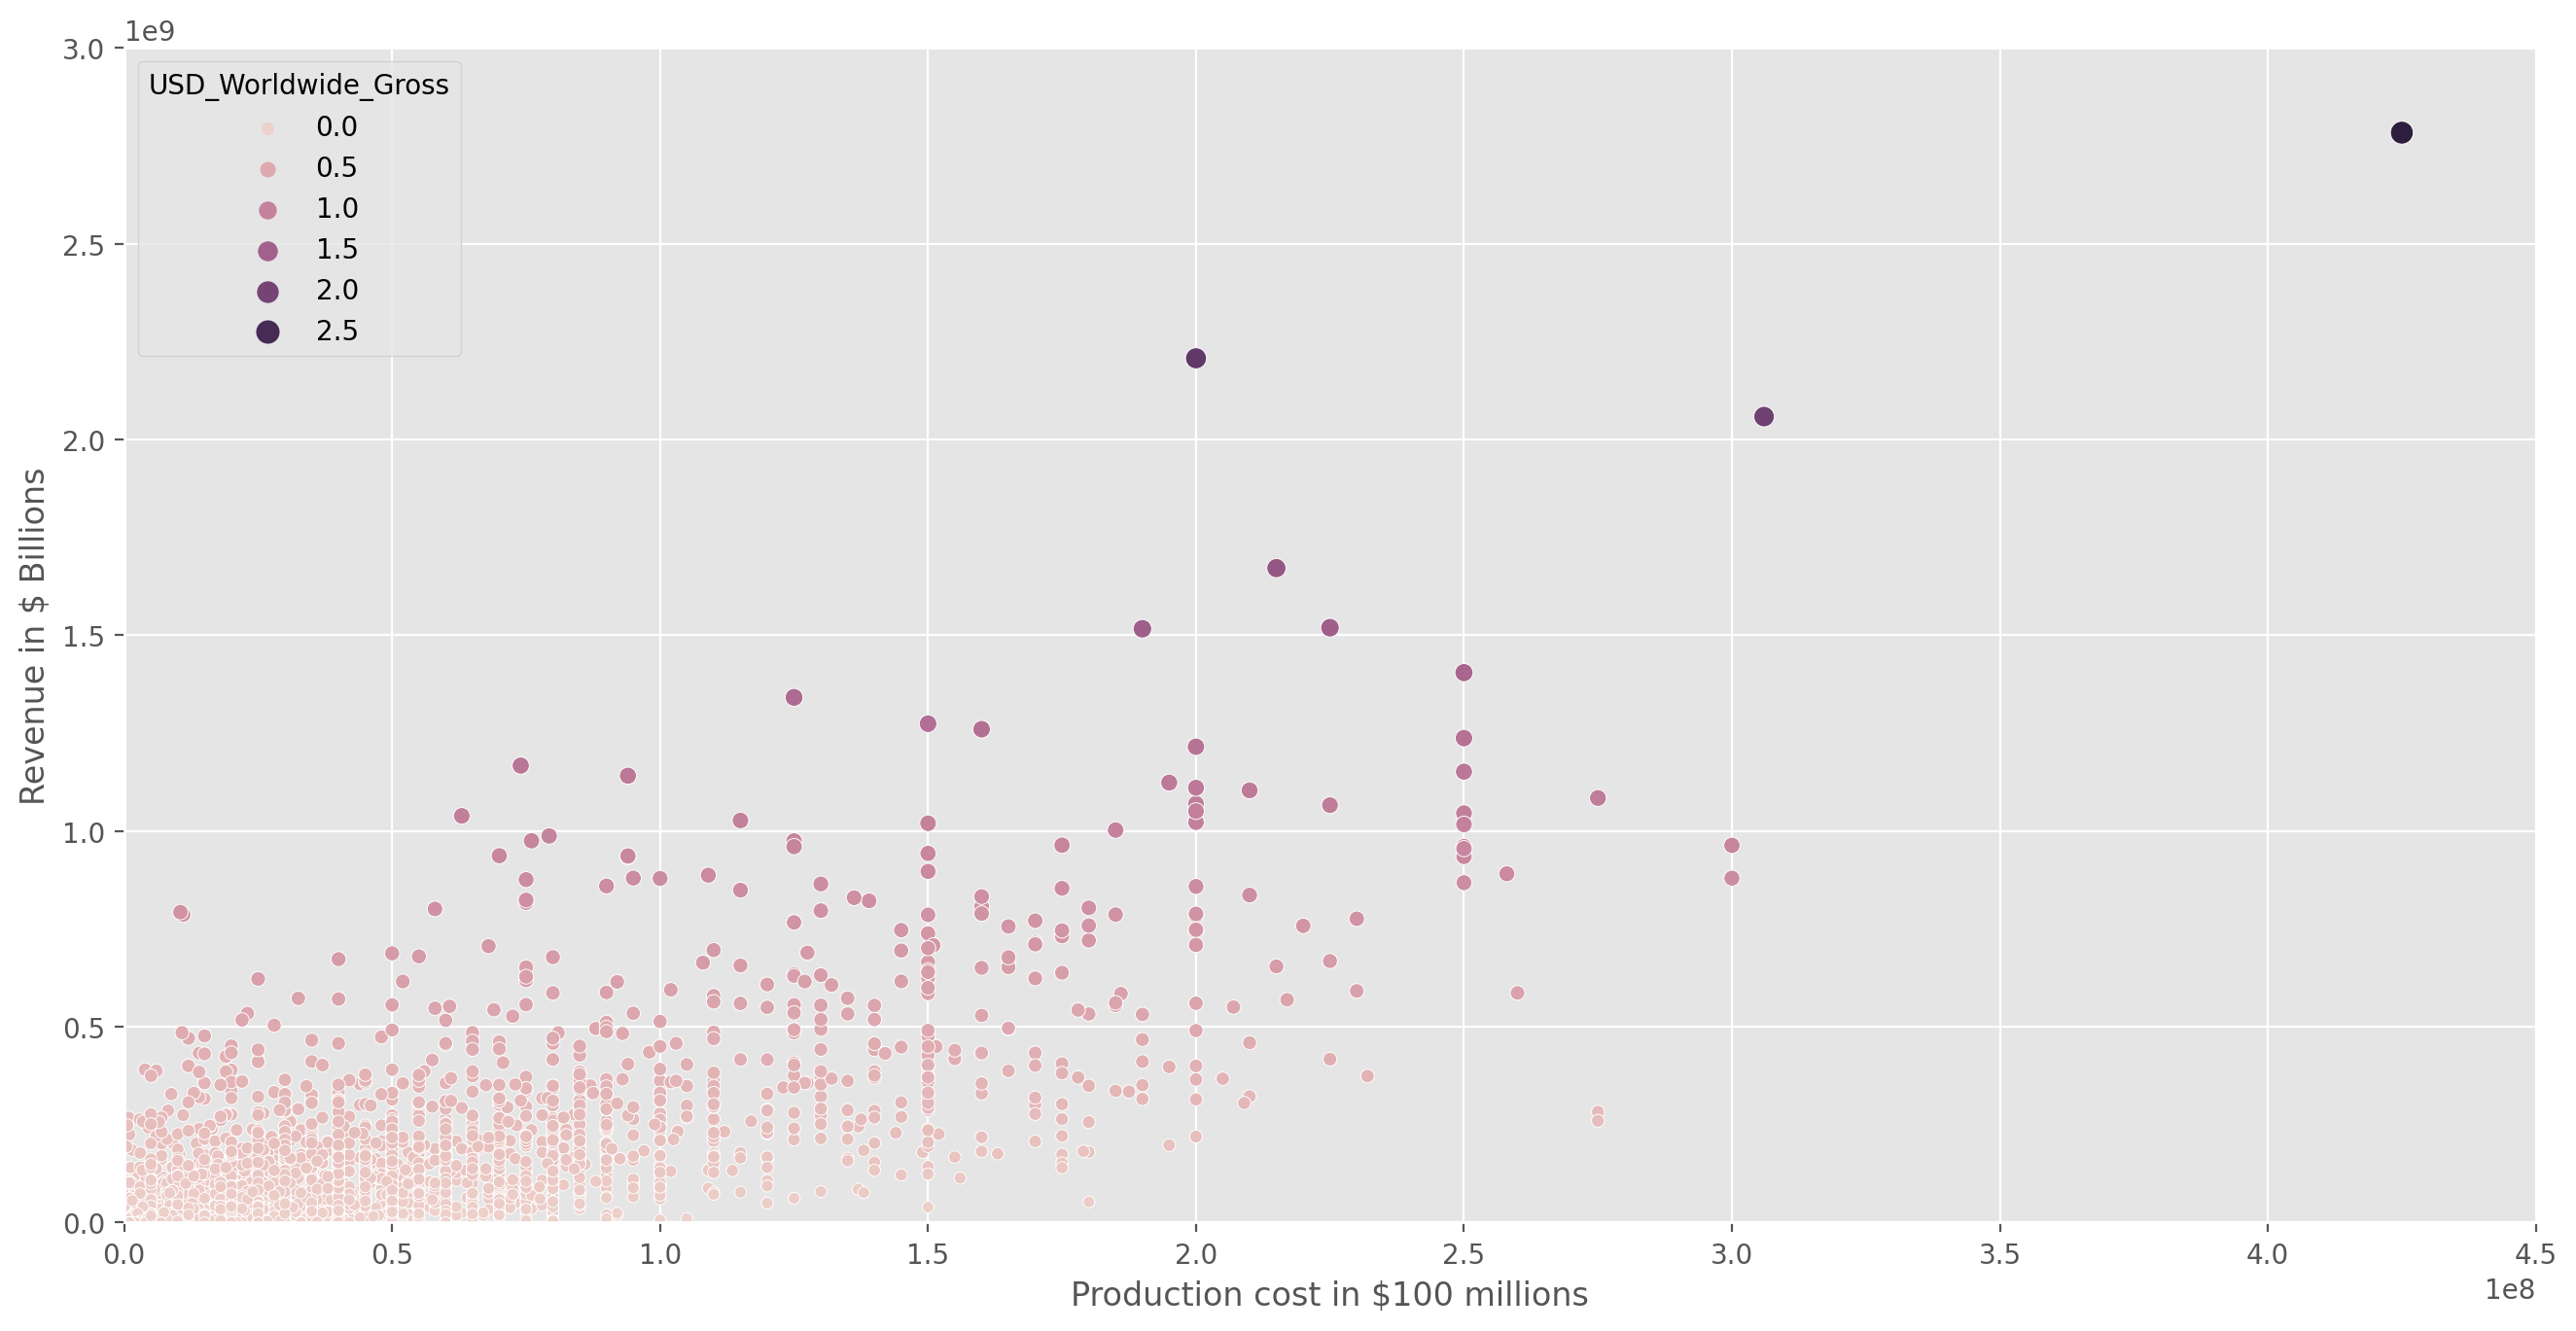

In [481]:
plt.figure(figsize=(16,8), dpi=200)
ax = sns.scatterplot(data=df, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel= 'Revenue in $ Billions',
       xlabel= 'Production cost in $100 millions')

plt.show();
                     

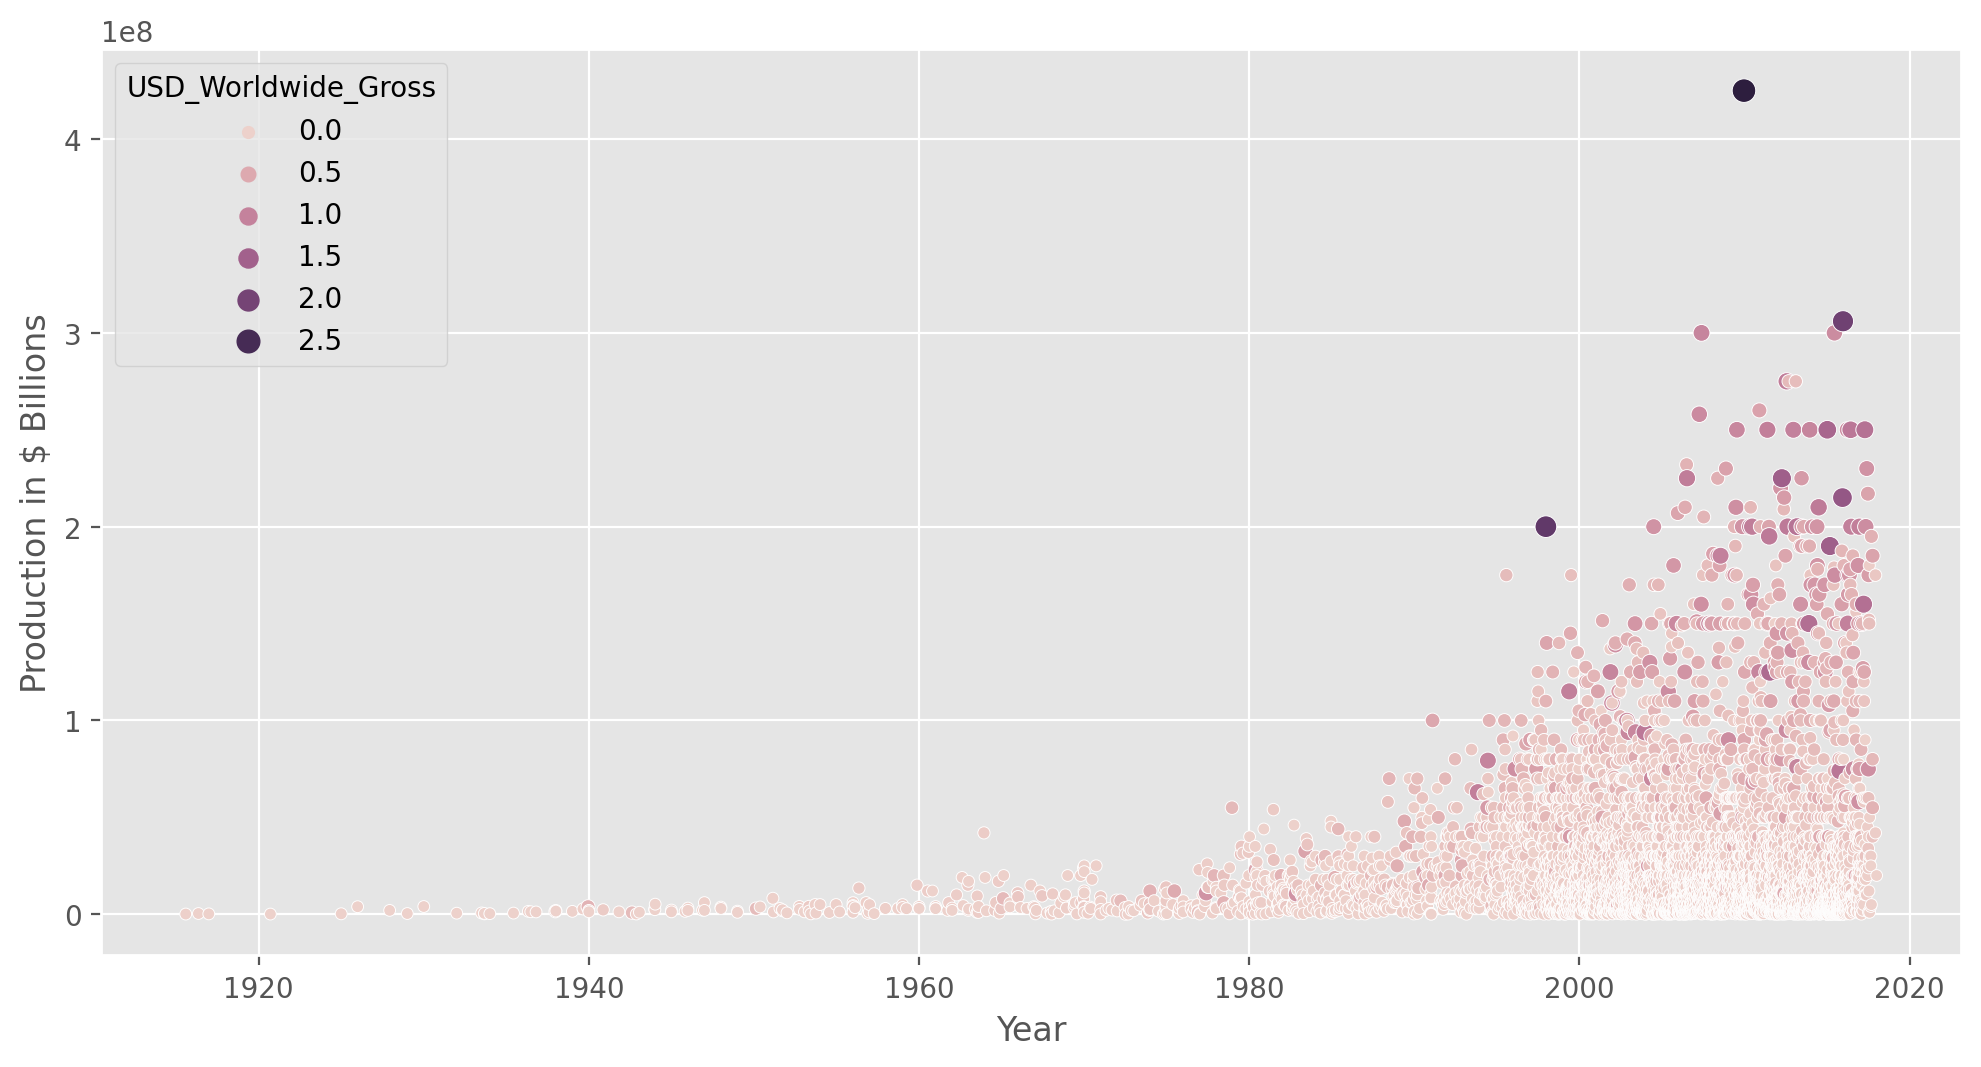

In [482]:
plt.figure(figsize=(12,6), dpi=200)
ax = sns.scatterplot(data=df, x='Release_Date', y='USD_Production_Budget', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylabel= 'Production in $ Billions',
       xlabel= 'Year')

plt.show();
            

We have seen how the film industry transformed massively from the 70's onwards. Let's seperate our dataset by decades now.

In [483]:
years = pd.DatetimeIndex(df.Release_Date).year
df['Decade'] = years//10*10
df.sample(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
1189,1009,1998-12-25,Patch Adams,50000000,202173000,135014968,152173000,1990
2098,847,2003-10-10,Intolerable Cruelty,60000000,121327628,35327628,61327628,2000
5150,2212,2016-02-26,Eddie the Eagle,23000000,45121177,15789389,22121177,2010


Sepereate the dataset by whether a film was produced before 70's or not

In [484]:
old_df = df.query('Decade < 1970')
df = df.query('Decade >= 1970')
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,-25000000,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,-17000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,50500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,-8800000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,78100000,1970


The most expensive film prior to 70's

In [485]:
old_df[old_df.USD_Production_Budget == old_df.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960


### Linear Regression

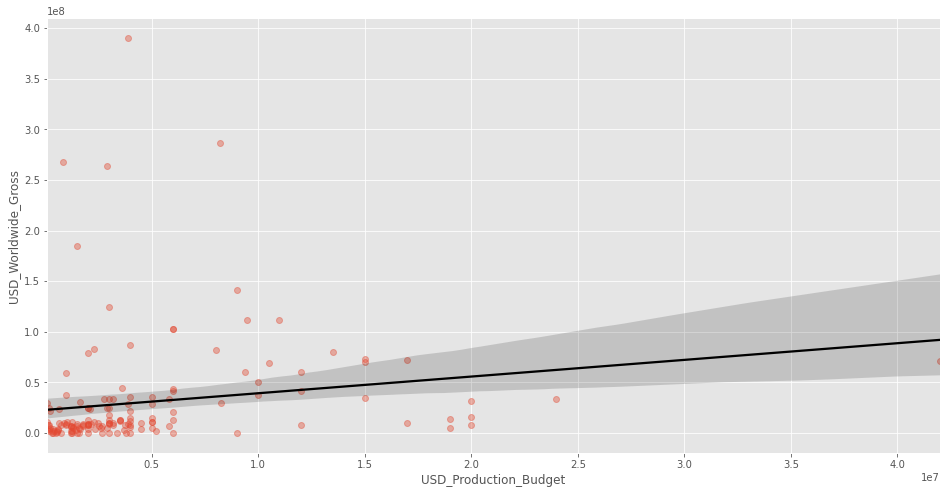

In [486]:
plt.figure(figsize=(16,8))
sns.regplot(data=old_df, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'});

We can spot Cleopatra on the far right, but many films with lower budgets made way more revenue than Cleopatra. Let's check if the same relation holds for the newer films

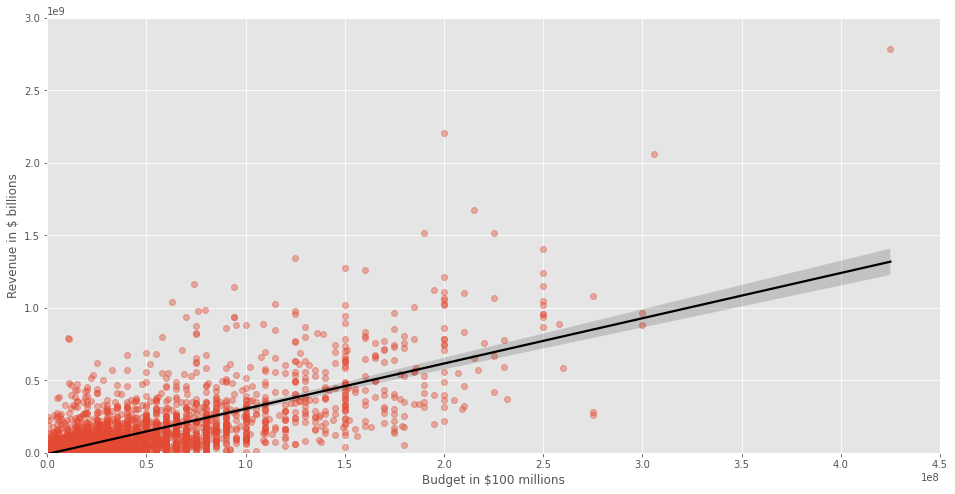

In [487]:
plt.figure(figsize=(16,8))
ax = sns.regplot(data=df, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

plt.show()

We can see that there is a more strong correlation between budget and revenue for the films from 70's onwards.

### Running Our Own Model with scikit-learn

In [488]:
regression = LinearRegression()

In [489]:
# Features
X = pd.DataFrame(df, columns=['USD_Production_Budget'])
 
# Target
y = pd.DataFrame(df, columns=['USD_Worldwide_Gross']) 

regression.fit(X, y)

LinearRegression()

In [490]:
# Theta zero
theta_zero = regression.intercept_
theta_one = regression.coef_
print(theta_zero, theta_one)

[-8650768.00661024] [[3.12259592]]


In [491]:
# R-squared
regression.score(X, y)

0.5577032617720403

Namely, our model explains about 56%  of the variance in the revenue. We can guess that linear regression would fit terribly for old_df. 

In [492]:
# Features
X = pd.DataFrame(old_df, columns=['USD_Production_Budget'])
 
# Target
y = pd.DataFrame(old_df, columns=['USD_Worldwide_Gross']) 

regression.fit(X, y)

# Theta zero
theta_zero = regression.intercept_
theta_one = regression.coef_
print(f" theta zero is {theta_zero[0]}, theta one is {theta_one[0][0]}")

# R-squared
print(f"The model explains about {round(regression.score(X, y)*100)}% of the variance in the revenue")

 theta zero is 22821538.635080382, theta one is 1.647713144010732
The model explains about 3% of the variance in the revenue
